In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt

In [4]:
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke_df.drop(columns=['bmi'], inplace=True)

In [6]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


In [7]:
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoders = {}
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column].astype(str))
            self.encoders[column] = le
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        for column, encoder in self.encoders.items():
            X_copy[column] = encoder.transform(X_copy[column].astype(str))
        return X_copy

In [8]:
encoder = MultiColumnLabelEncoder()

In [9]:
stroke_encoded = encoder.fit_transform(stroke_df)
stroke_encoded

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,5053,1,85,0,1,1,2,1,1618,1,1
1,3218,0,79,0,0,1,3,0,1356,2,1
2,1593,1,100,0,1,1,2,0,251,2,1
3,3907,0,65,0,0,1,2,1,1153,3,1
4,530,0,98,1,0,1,3,0,1162,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,652,0,100,1,0,1,2,1,3107,2,0
5106,2641,0,101,0,0,1,3,1,798,2,0
5107,745,0,50,0,0,1,3,0,3061,2,0
5108,2105,1,68,0,0,1,2,0,1131,1,0


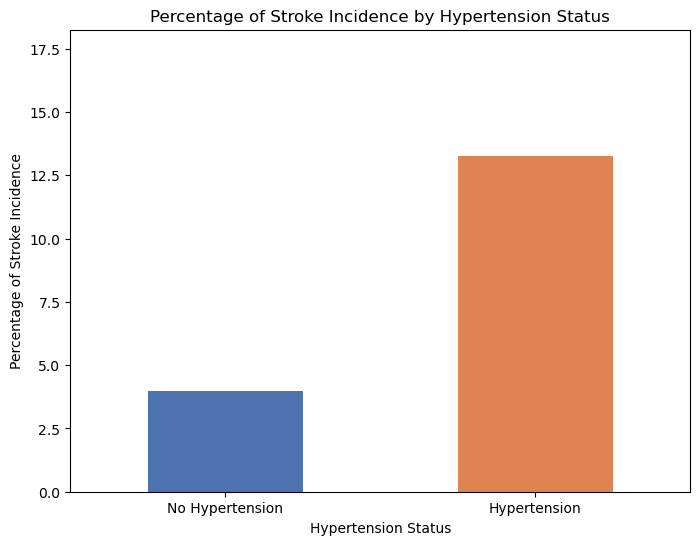

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'hypertension' and 'stroke' columns are encoded as 0s and 1s.
# Group by 'hypertension' and calculate the mean 'stroke' rate for each group.
stroke_rate_by_hypertension = stroke_encoded.groupby('hypertension')['stroke'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
stroke_rate_by_hypertension.plot(kind='bar', color=['#4C72B0', '#DD8452'])
plt.title('Percentage of Stroke Incidence by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Percentage of Stroke Incidence')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'], rotation=0)
plt.ylim(0, max(stroke_rate_by_hypertension) + 5)  # Adjust y-axis to show labels more clearly
plt.show()


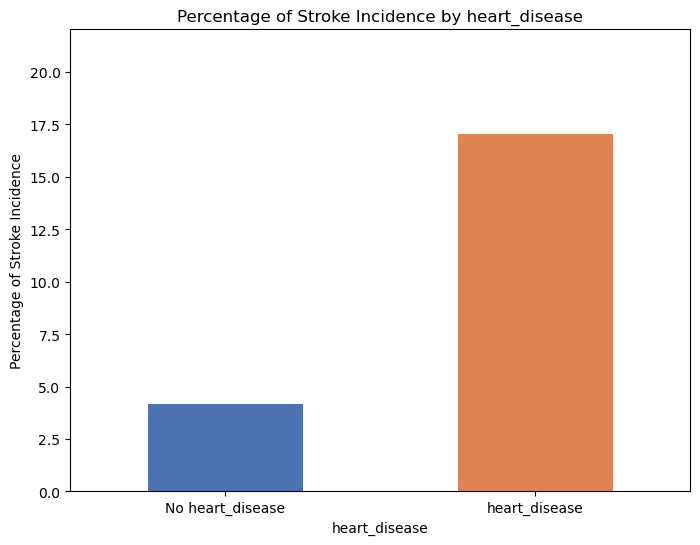

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'hypertension' and 'stroke' columns are encoded as 0s and 1s.
# Group by 'hypertension' and calculate the mean 'stroke' rate for each group.
stroke_rate_by_hypertension = stroke_encoded.groupby('heart_disease')['stroke'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
stroke_rate_by_hypertension.plot(kind='bar', color=['#4C72B0', '#DD8452'])
plt.title('Percentage of Stroke Incidence by heart_disease')
plt.xlabel('heart_disease')
plt.ylabel('Percentage of Stroke Incidence')
plt.xticks(ticks=[0, 1], labels=['No heart_disease', 'heart_disease'], rotation=0)
plt.ylim(0, max(stroke_rate_by_hypertension) + 5)  # Adjust y-axis to show labels more clearly
plt.show()


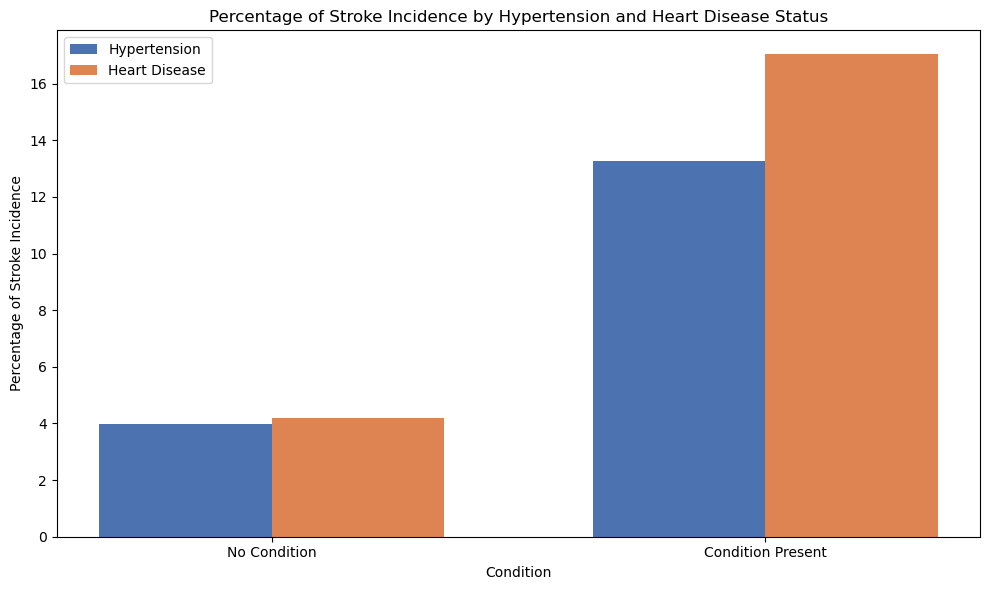

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean 'stroke' rate for each group of 'hypertension' and 'heart_disease'
stroke_rate_by_hypertension = stroke_encoded.groupby('hypertension')['stroke'].mean() * 100
stroke_rate_by_heart_disease = stroke_encoded.groupby('heart_disease')['stroke'].mean() * 100

# Set the positions and width for the bars
positions = np.arange(2)
bar_width = 0.35

# Plot
plt.figure(figsize=(10, 6))

# Plotting bar for 'hypertension'
plt.bar(positions - bar_width / 2, stroke_rate_by_hypertension, width=bar_width, color='#4C72B0', label='Hypertension')

# Plotting bar for 'heart_disease'
plt.bar(positions + bar_width / 2, stroke_rate_by_heart_disease, width=bar_width, color='#DD8452', label='Heart Disease')

# Adding labels and title
plt.title('Percentage of Stroke Incidence by Hypertension and Heart Disease Status')
plt.xlabel('Condition')
plt.ylabel('Percentage of Stroke Incidence')
plt.xticks(positions, ['No Condition', 'Condition Present'])

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


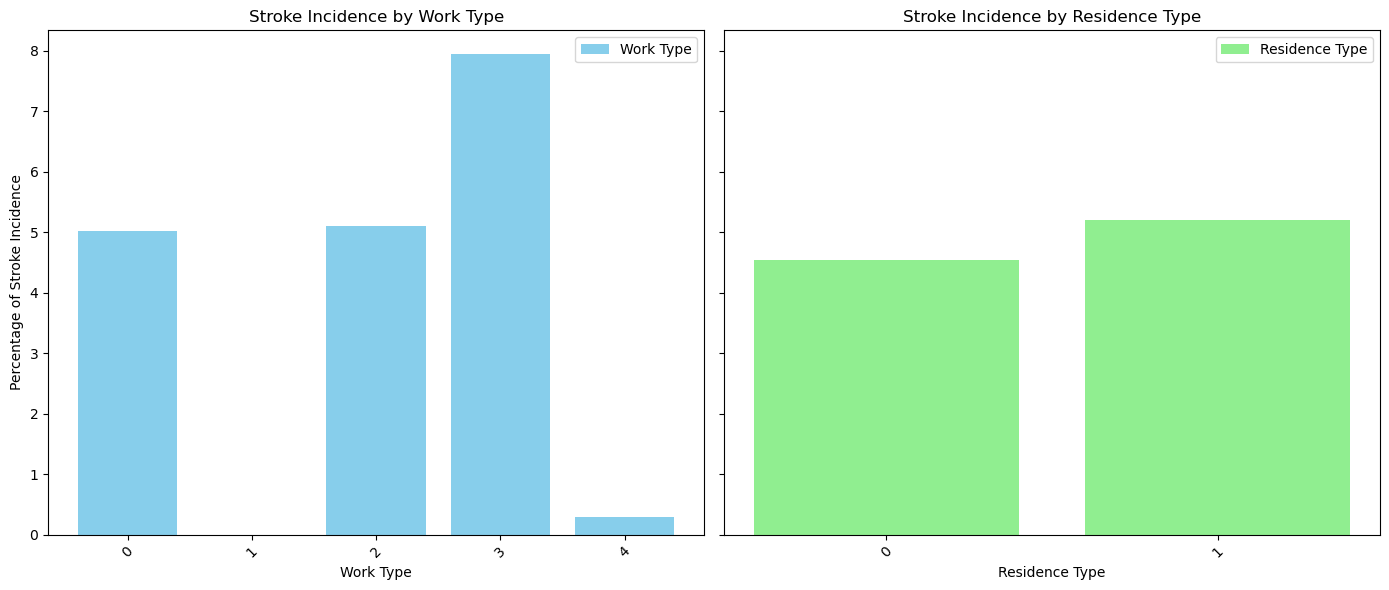

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean 'stroke' rate for each 'work_type' and 'Residence_type'
stroke_rate_by_work_type = stroke_encoded.groupby('work_type')['stroke'].mean() * 100
stroke_rate_by_residence_type = stroke_encoded.groupby('Residence_type')['stroke'].mean() * 100

# Sorting the work type stroke rates for consistent plotting
stroke_rate_by_work_type.sort_index(inplace=True)

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for 'work_type'
work_type_positions = np.arange(len(stroke_rate_by_work_type))
ax[0].bar(work_type_positions, stroke_rate_by_work_type, color='skyblue', label='Work Type')
ax[0].set_xlabel('Work Type')
ax[0].set_xticks(work_type_positions)
ax[0].set_xticklabels(stroke_rate_by_work_type.index, rotation=45)
ax[0].set_title('Stroke Incidence by Work Type')
ax[0].set_ylabel('Percentage of Stroke Incidence')

# Plot for 'Residence_type'
residence_type_positions = np.arange(len(stroke_rate_by_residence_type))
ax[1].bar(residence_type_positions, stroke_rate_by_residence_type, color='lightgreen', label='Residence Type')
ax[1].set_xlabel('Residence Type')
ax[1].set_xticks(residence_type_positions)
ax[1].set_xticklabels(stroke_rate_by_residence_type.index, rotation=45)
ax[1].set_title('Stroke Incidence by Residence Type')

# Adding a legend
ax[0].legend()
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
# Retrieve the LabelEncoder for 'work_type' from the encoder object
work_type_encoder = encoder.encoders['work_type']

# Get the class labels (original text labels) and the corresponding encoded values
work_type_classes = work_type_encoder.classes_
work_type_mapping = {label: idx for idx, label in enumerate(work_type_classes)}

print("Work Type Encoding Mapping:")
print(work_type_mapping)


Work Type Encoding Mapping:
{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
